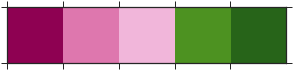

In [31]:
from donut import *
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import os

%matplotlib inline

import seaborn as sns
cp = ["#8e0152","#de77ae","#f1b6da","#4d9221","#276419"]
cm = "#8e0152"
cg = "#276419"
sns.palplot(sns.color_palette(cp, 5))
sns.set(style='ticks',palette=cp)

w = cruller.WordList()
w.LoadFromFile("/Users/Rylan/cisc/creamTeam/wordLists/WordList_100000_combined_check.dat")

k = bearclaw.MakeStandardKeyboard()
k.RemoveKey('.')
kStan = k

In [2]:
# Read in the data from the files

cart_filename = "/Users/Rylan/cisc/creamTeam/donutData/IJHCS/distStudy/IJHCS_mcCart_vs_mcNN_cart.dat"
nn_filename = "/Users/Rylan/cisc/creamTeam/donutData/IJHCS/distStudy/IJHCS_mcCart_vs_mcNN_nn.dat"

if os.path.exists(cart_filename) and os.path.exists(nn_filename):
    print(cart_filename, '\n', nn_filename, sep='')
    cart_dat, nn_dat = cruller.TrainingDataFileFormat(), cruller.TrainingDataFileFormat()
    nn_dat.LoadFromFile(nn_filename)
    cart_dat.LoadFromFile(cart_filename)
    
cart_meta, cart_data = cart_dat.PythonData()
nn_meta, nn_data = nn_dat.PythonData()

print('\n',cart_meta,'\n',nn_meta,'\n',sep='')
keyboard, d = cart_data[0]
print(d,'\n')
print('cart_data length =', len(cart_data), '\nnn_data length =', len(nn_data)) 

/Users/Rylan/cisc/creamTeam/donutData/IJHCS/distStudy/IJHCS_mcCart_vs_mcNN_cart.dat
/Users/Rylan/cisc/creamTeam/donutData/IJHCS/distStudy/IJHCS_mcCart_vs_mcNN_nn.dat

{'distancemeasure': 'cart dist with spatial interp', 'wordlistname': 'google_20k', 'inputmodel': 'spatial interpolation', 'wordlist': <donut.cruller.WordList object at 0x7f81d1e02c18>}
{'distancemeasure': 'fann net with spatial interp', 'wordlistname': 'google_20k', 'inputmodel': 'spatial interpolation', 'wordlist': <donut.cruller.WordList object at 0x7f81d4836418>}

{'spatial': <donut.cruller.FitnessResult object at 0x10b72a5e8>} 

cart_data length = 20 
nn_data length = 20


In [4]:
# Extract the efficiency values and corresponding errors

cart_effs, nn_effs, cart_errors, nn_errors, cart_keyboards, nn_keyboards = [],[],[],[],[],[]

if len(cart_data) == len(nn_data):
    for i in range(len(cart_data)):
        cart_keyboard, cart_d = cart_data[i]
        cart_keyboards.append(cart_keyboard)
        cart_effs.append(cart_d['spatial'].Fitness())
        cart_errors.append(cart_d['spatial'].Error())
        
        nn_keyboard, nn_d = nn_data[i]
        nn_keyboards.append(nn_keyboard)
        nn_effs.append(nn_d['spatial'].Fitness())
        nn_errors.append(nn_d['spatial'].Error())

[print("%.3f +/- %.3f   %.3f +/- %.3f   %d" % (nn_eff, nn_error, cart_eff, cart_error, nn_eff > cart_eff)) for nn_eff, cart_eff, nn_error, cart_error in zip(nn_effs,cart_effs,nn_errors,cart_errors)]
print()

0.843 +/- 0.012   0.827 +/- 0.012   1
0.882 +/- 0.010   0.831 +/- 0.012   1
0.853 +/- 0.011   0.769 +/- 0.013   1
0.884 +/- 0.010   0.785 +/- 0.013   1
0.871 +/- 0.011   0.808 +/- 0.012   1
0.882 +/- 0.010   0.840 +/- 0.012   1
0.836 +/- 0.012   0.770 +/- 0.013   1
0.875 +/- 0.010   0.834 +/- 0.012   1
0.855 +/- 0.011   0.782 +/- 0.013   1
0.861 +/- 0.011   0.798 +/- 0.013   1
0.870 +/- 0.011   0.803 +/- 0.013   1
0.877 +/- 0.010   0.791 +/- 0.013   1
0.855 +/- 0.011   0.790 +/- 0.013   1
0.862 +/- 0.011   0.809 +/- 0.012   1
0.866 +/- 0.011   0.832 +/- 0.012   1
0.882 +/- 0.010   0.791 +/- 0.013   1
0.881 +/- 0.010   0.828 +/- 0.012   1
0.875 +/- 0.010   0.829 +/- 0.012   1
0.880 +/- 0.010   0.823 +/- 0.012   1
0.876 +/- 0.010   0.820 +/- 0.012   1



In [5]:
# Check to make sure the nn and cart data points correspond to the same keyboards

keyboard_check = True
for i in range(len(cart_keyboards)):
    cart_k = ''.join(cart_keyboards[i].OrderedKeyList())
    nn_k = ''.join(nn_keyboards[i].OrderedKeyList())
    if cart_k != nn_k:
        print('ERROR: Keyboards don\'n match')
        keyboard_check = False
        break
    
if keyboard_check:
    print('All keyboards match')

All keyboards match


In [43]:
# Calculate the average efficiency for the nn_dist and cart_dist methods and transform into error rates

avg_nn_eff = sum(nn_effs)/len(nn_effs)
avg_nn_error = statistics.pstdev(nn_effs)/math.sqrt(len(nn_effs))
                                                    
avg_cart_eff = sum(cart_effs)/len(cart_effs)
avg_cart_error = statistics.pstdev(cart_effs)/math.sqrt(len(cart_effs))

nn_error_rates = [1-x for x in nn_effs]
cart_error_rates = [1-x for x in cart_effs]
avg_nn_error_rate = 1 - avg_nn_eff
avg_cart_error_rate = 1 - avg_cart_eff

print('Average Efficiencies')
print('NN:   ', avg_nn_eff, '+/-', avg_nn_error)
print('Cart: ', avg_cart_eff, '+/-', avg_cart_error, '\n')
print('Average Error Rates')
print('NN:   ', avg_nn_error_rate, '+/-', avg_nn_error)
print('Cart: ', avg_cart_error_rate, '+/-', avg_cart_error)

Average Efficiencies
NN:    0.8683 +/- 0.003046391307760711
Cart:  0.808 +/- 0.004892340952959017 

Average Error Rates
NN:    0.1317 +/- 0.003046391307760711
Cart:  0.192 +/- 0.004892340952959017


<Container object of 3 artists>

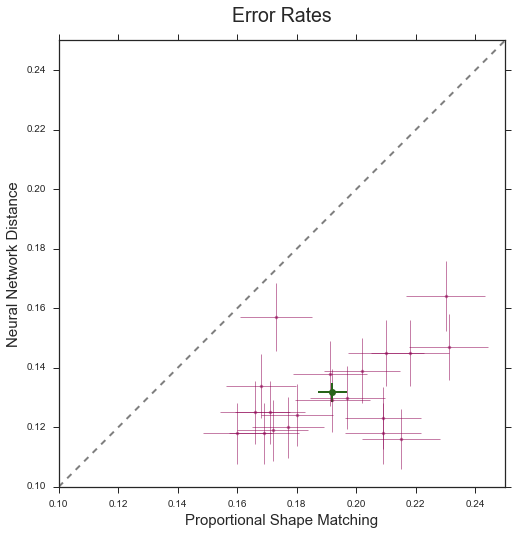

In [52]:
# Plot the data

ll, ul = 0.1, 0.25
lfs = 15

plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([ll,ul])
plt.ylim([ll,ul])
plt.xlabel('Proportional Shape Matching', fontsize=lfs)
plt.ylabel('Neural Network Distance', fontsize=lfs)
plt.title('Error Rates', fontsize=lfs*1.3, y=1.03)
plot([ll,ul],[ll,ul],ls='--',lw=2,alpha=0.5,color='black')
plt.errorbar(cart_error_rates, nn_error_rates, xerr=cart_errors, yerr=nn_errors, color=cm, fmt='.', lw=1, alpha=0.5)
plt.errorbar(avg_cart_error_rate, avg_nn_error_rate, xerr=avg_cart_error, yerr=avg_nn_error, color=cg, fmt='o', ms=7, lw=2)